In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("./Telco-Customer-Churn.csv")

<strong>For more insights about this dataset, visit:</strong>
<li><a href="https://archive.ics.uci.edu/ml/datasets/Telecom+Customer+Churn">UCL</a></li>
<li><a href="https://www.kaggle.com/blastchar/telco-customer-churn">Kaggle</a></li>

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### No null values

In [5]:
df['customerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [6]:
# Let's drop customerID, it's not relevant
df.drop('customerID', axis=1, inplace=True)

In [7]:
# let's have a unifrom name conventsion for the labels. Let's make all of them titled
df.columns = [col[0].capitalize() + col[1:] for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Let's Explore the Data

In [8]:
for col in df.columns:
    print(col, df[col].unique())

Gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [9]:
# TotalCharges should be numeric.
# Let's convert it to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Now, let's check if there are any missing values in the 'TotalCharges' column and fill them with the mean
df['TotalCharges'].isnull().sum()

11

In [10]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
df['TotalCharges'].isnull().sum()

0

### SeniorCitizen, tunure and MonthlyCharges looks fine.

In [11]:
# This dict would be used to encode the inary classes
encode_dict = {
    'Female': 0,
    'Male': 1,
    'No': 0,
    'Yes': 1,
    'No phone service': 0,
    'No internet service': 0,
}
bin_cols = [
    'Gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn',
    'SeniorCitizen'
]
non_bin_categorical_cols = [
    'InternetService',
    'Contract',
    'PaymentMethod',
]
continuos_cols = [
    'Tenure',
    'MonthlyCharges',
    'TotalCharges',
]

## Continous columns 

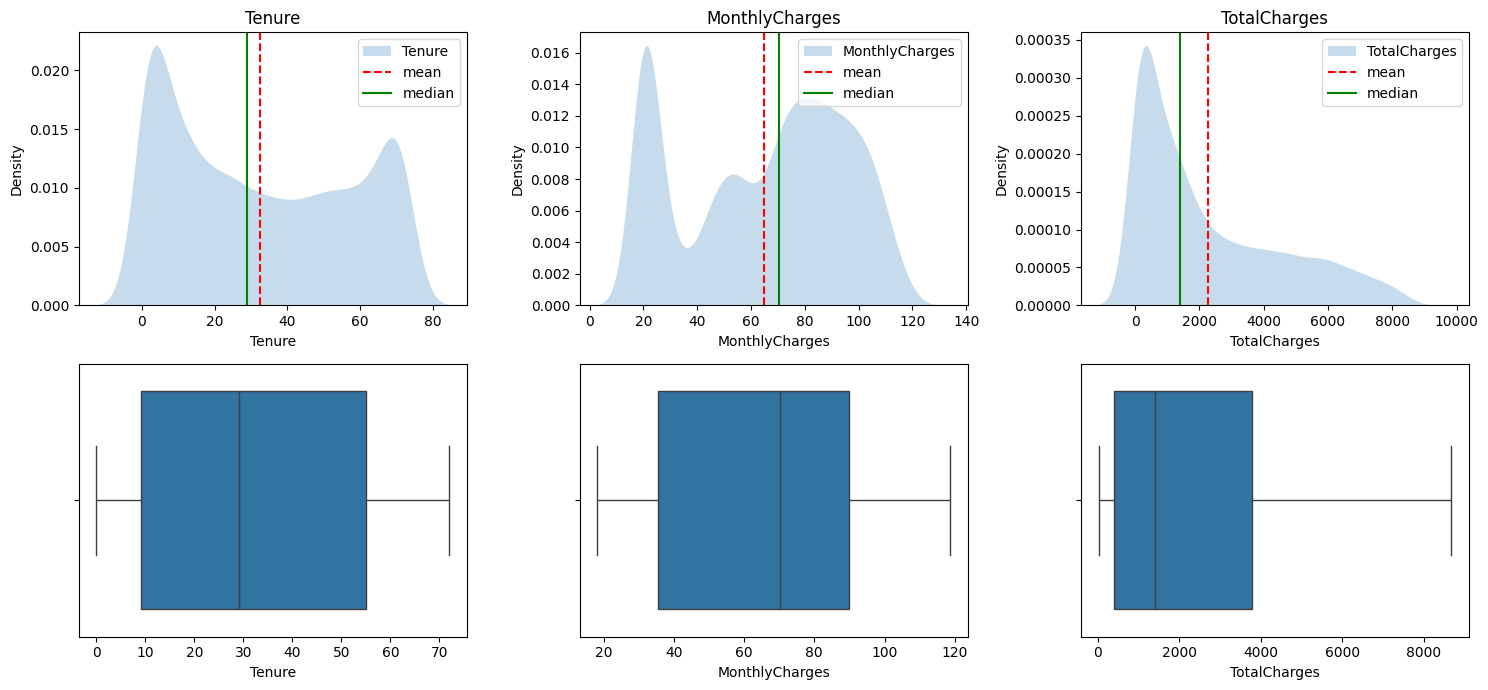

In [12]:
# Let's explore the continous variable cols
plt.figure(figsize=(15, 7))
for i, col in enumerate(continuos_cols, start=1):
    plt.subplot(2, len(continuos_cols), i)
    sns.kdeplot(df[col], fill=True, linewidth=0, label=f"{col}")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='mean')
    plt.axvline(df[col].median(), color='green', linestyle='-', label='median')
    plt.title(col)
    plt.legend()

    plt.subplot(2, len(continuos_cols), i + len(continuos_cols))
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

## Looking at the graphs

### Monthly Charges
- The median is around 70, and the mean is around 65.
- The distribution appears to have multiple modes or peaks, suggesting distinct customer segments.
- The range of monthly charges spans from the lowest bin, around $5, up to around $130, indicating a wide range of charges applied to customers.
- There is a high frequency of low charges and a low frequency of high charges, indicating that many customers pay for basic services.
- No outliers

### Tenure
- The median is around 30, and the mean is around 32.
- The range of tenure spans from the lowest bin, around 0, up to around 70, indicating a wide range of tenure for customers.
- Around 5 months, we see that most customers end their tenure, suggesting a problem with new customer retention.
- There is a high number of customers with high tenure, indicating that if a customer is able to stay for a particular period of time, they are likely not to churn.
- No outliers

### Total Charges
- The median is around 1400, and the mean is around 2300.
- There are many customers with low total charges compared to high total charges. The high charges customers are likely to be premium users.
- No outliers **

This notebook focuses more on the ML models part rather than exploratory analysis!


In [13]:
df[continuos_cols].skew()

Tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

<h1 style="color: yellow">NOTE: Total charges is highly skewed, we'd have to transform it.</h1>

# Non binary categorical columns

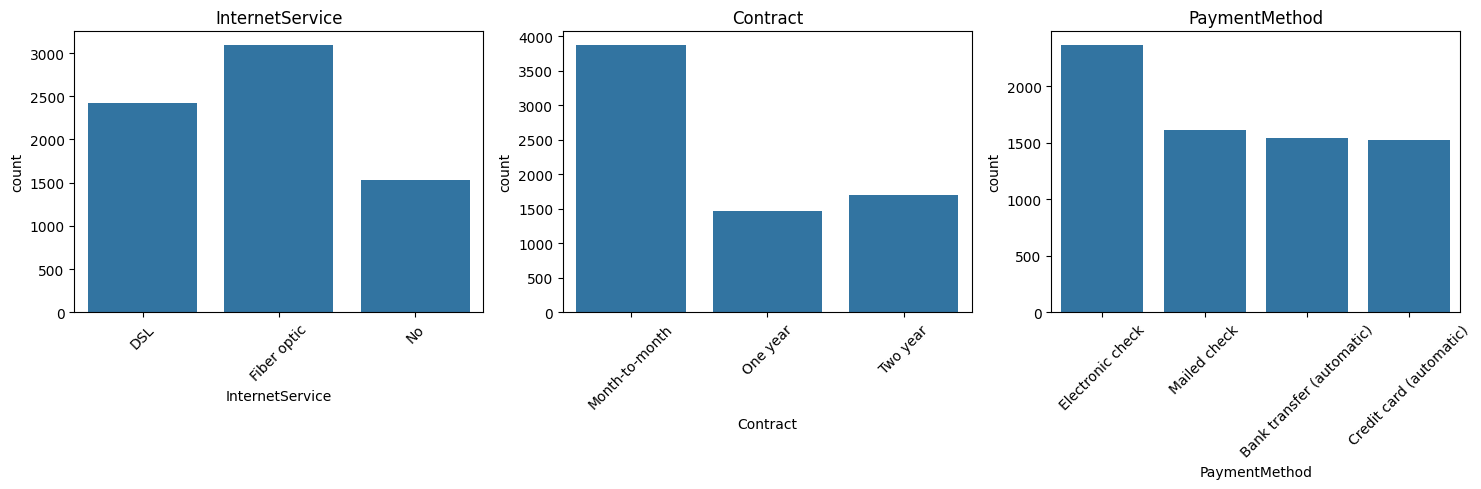

In [14]:
# Let's explore the categorical cols that aren't binary
plt.figure(figsize=(15, 5))
for i, col in enumerate(non_bin_categorical_cols, start=1):
    plt.subplot(1, len(non_bin_categorical_cols), i)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()


From the graphs above:

- Most of the customers have fiber optic internet service. This indicates that fiber optic is a popular choice among customers, possibly due to its faster internet speeds.
- Most of the customers have month-to-month contracts. This suggests that customers prefer flexibility and may not want to commit to long-term contracts.
- Most of the customers pay with electronic check. Electronic check is the preferred payment method for the majority of customers, indicating a preference for convenient and digital payment options.

These insights provide valuable information about the customer base and their preferences, which can be taken into consideration when developing strategies to improve customer retention and satisfaction.

In [15]:
# Let's encode these categorical columns with one hot and continue with the analysis
df = pd.get_dummies(df, columns=non_bin_categorical_cols, drop_first=True)
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,No,Yes,No,...,29.85,29.85,No,False,False,False,False,False,True,False
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,56.95,1889.50,No,False,False,True,False,False,False,True
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,53.85,108.15,Yes,False,False,False,False,False,False,True
3,Male,0,No,No,45,No,No phone service,Yes,No,Yes,...,42.30,1840.75,No,False,False,True,False,False,False,False
4,Female,0,No,No,2,Yes,No,No,No,No,...,70.70,151.65,Yes,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,...,84.80,1990.50,No,False,False,True,False,False,False,True
7039,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,...,103.20,7362.90,No,True,False,True,False,True,False,False
7040,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,...,29.60,346.45,No,False,False,False,False,False,True,False
7041,Male,1,Yes,No,4,Yes,Yes,No,No,No,...,74.40,306.60,Yes,True,False,False,False,False,False,True


# Binary Column

In [16]:
# Let's explore the binary cols
# Let's map them to 1 and 0 before exploring
df[bin_cols] = df[bin_cols].applymap(lambda x: x if x in [0, 1] else encode_dict.get(x))
df

C:\Users\HP\AppData\Local\Temp\ipykernel_8128\1934357920.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[bin_cols] = df[bin_cols].applymap(lambda x: x if x in [0, 1] else encode_dict.get(x))


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


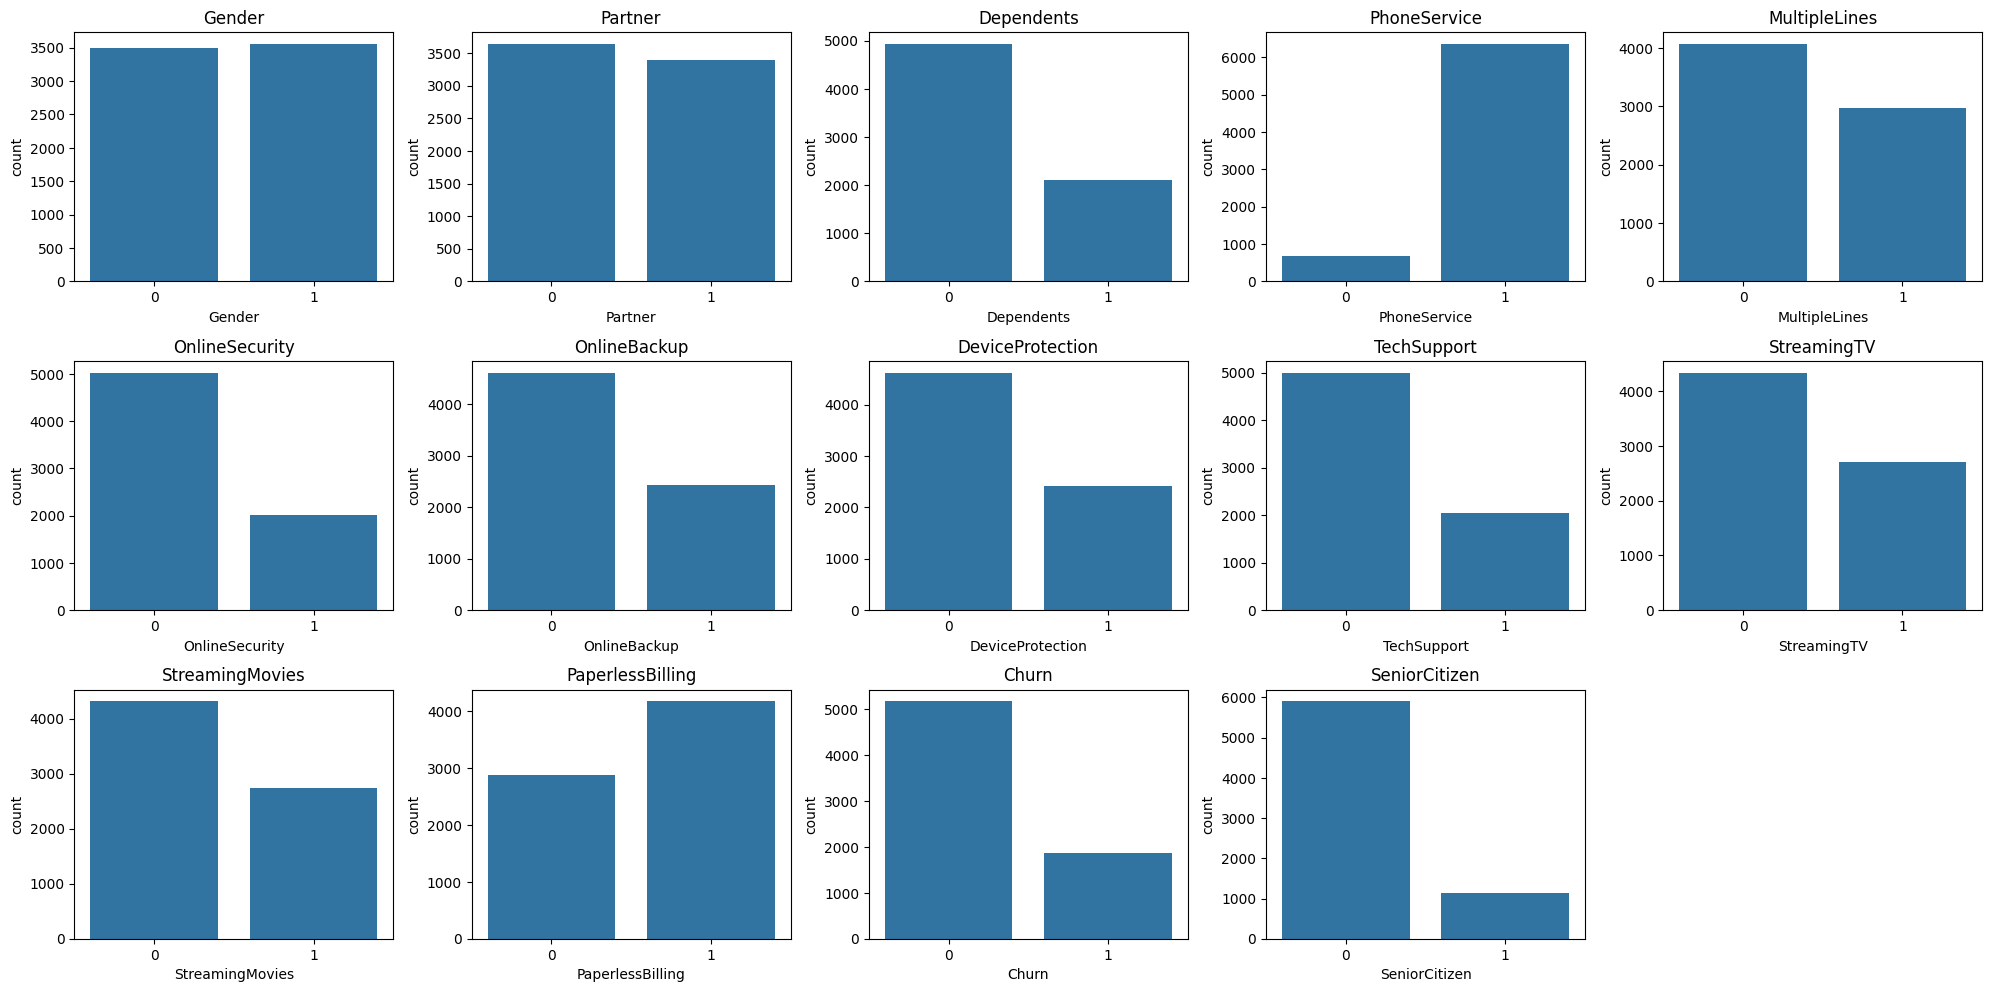

In [17]:
# now let's explore the bin columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(bin_cols, start=1):
    plt.subplot(3, 5, i)
    sns.countplot(x=df[col])
    plt.title(col)
plt.tight_layout(pad=1)

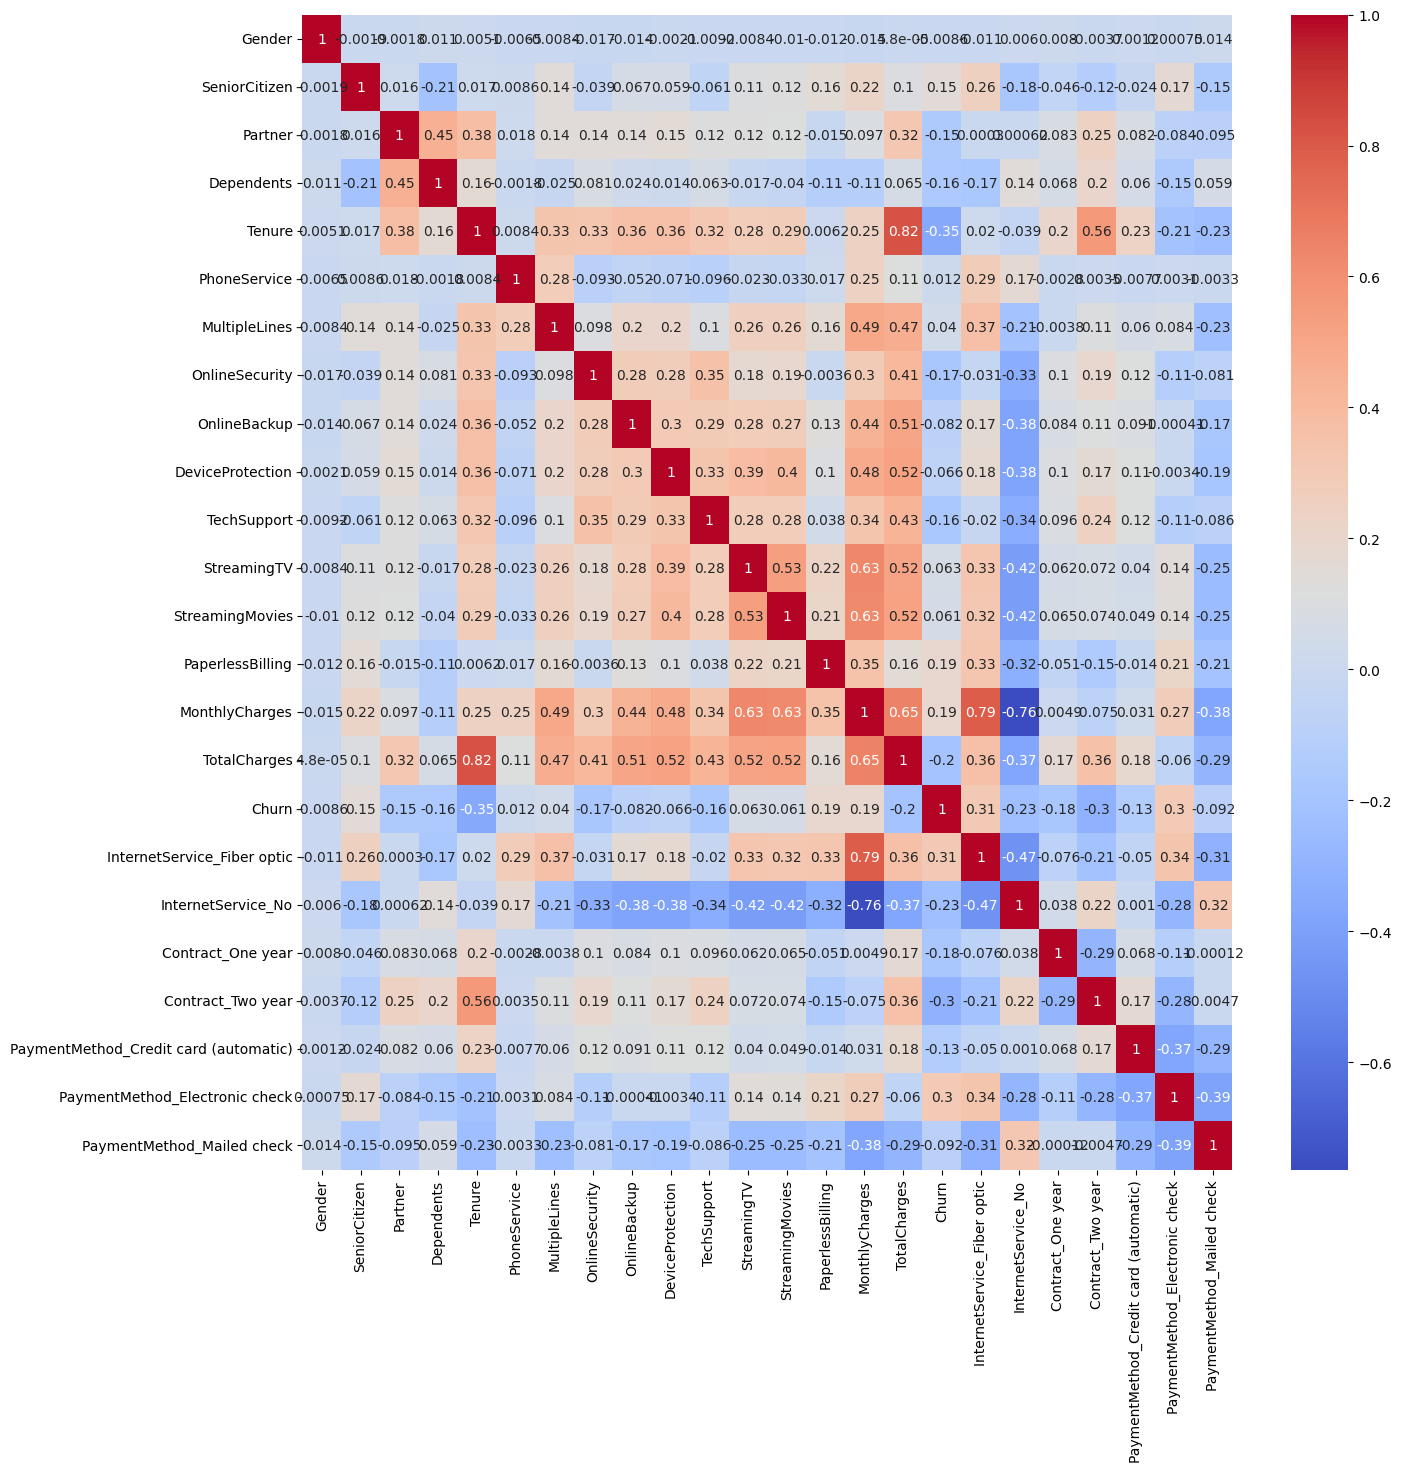

In [18]:
# From the binary graphs
# We can see that there are more customers who are not senior citizens
# There are more customers who have phone service
# These 2 have a very high inbalance

# Let's explore the correlation between the features
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# From the heatmap
From the heatmap, we can observe the following correlations:

- There is a high correlation between the tenure and total charges.
- There is also a high correlation between the monthly charges and total charges.
- It is worth noting that the total charges column might be dropped due to its high correlation with other variables.
- Additionally, there is a high correlation between the monthly charges and the internet service type (fiber optic and no internet service).
- There is also a moderate correlation between streaming movies and streaming TV.

These insights suggest that the total charges column may not provide significant additional information and could potentially introduce multicollinearity issues. Considering the high correlation between tenure and total charges, it might be more appropriate to use tenure as a predictor instead.

Further analysis and feature selection techniques can be applied to identify the most relevant variables for predicting customer churn accurately.

Text(0.5, 1.0, 'Churn')

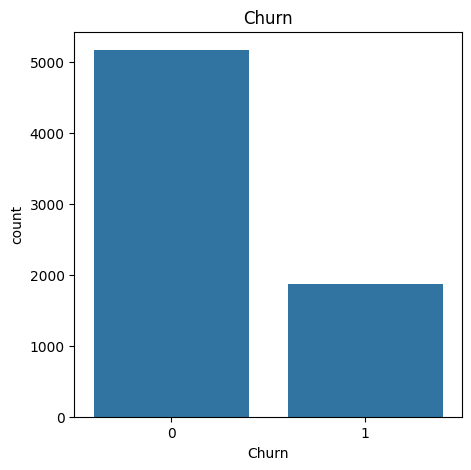

In [19]:
# Let's explore the output label
plt.figure(figsize=(5, 5))
sns.countplot(x=df['Churn'])
plt.title('Churn')

<h3 style="color: yellow;"> NOTE: From the graph, We can see that the data is highly imbalanced</h3>

<p style="color:yellow;">We'd concentrate more on recall as we build models. We'd actually wanna get all people who would possibly churn.</p>


### We'd create a super class the we'd use to create subclasses for evaluating different model types
### Because our streamlit app is in a different module and would require these classes, we defind the classes in a different module that would be imported in here and the st app.

<h1 style="color: violet">Logistic Regression</h1>

### We'd import the logistic regression class

In [21]:
from classes import MyLogisticInvestigator

### Let's create a model and test it.

In [176]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


lr = MyLogisticInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)

model_dict = lr.investigate(
    scaler=MinMaxScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["TotalCharges"],
    handle_inbalance=lr.ROS,
    model__C=0.01,
    model__penalty="l2",
    model__solver="lbfgs",
    model__max_iter=3000,
    model__class_weight={1: 0.53, 0: 0.47},
    scoring="recall",
    # model_type="bagging",
    # model__n_estimators=50,
    # model__learning_rate=1,
)
lr.print_report(model_dict)
print("ON TEST DATA")
metrics, fig = lr.evaluate_model(model_dict.get("model"), lr.X_val, lr.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics_, fig_ = lr.evaluate_model(model_dict.get("model"), lr.X_train, lr.y_train)
print(metrics_)
model_dict["model"]

Scaler:  MinMaxScaler
Drop columns:  None
Handle inbalance:  ROS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 0 0 1]
             Metric                    Score
0         Precision                 0.530303
1            Recall                 0.833333
2          F1 Score                 0.648148
3           ROC AUC                 0.858596
4  confusion matrix  [[752, 279], [63, 315]]
ON TRAIN DATA
[0 0 1 ... 1 1 1]
             Metric                        Score
0         Precision                     0.742198
1            Recall                      0.81511
2          F1 Score                     0.776947
3           ROC AUC                     0.848208
4  confusion matrix  [[2970, 1173], [766, 3377]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <classes.MyLogisticInvestigator object at 0x000001B7073DB910>>),
                                                  Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection'...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=0.01, class_weight={0: 0.47, 1: 0.53},
                                    max_iter=3000))])

- The above after a few tweeking, I thought is okay so we can move on to other models. 
- I saw that I could get a recall as high as 97+ percent at the expense of the precission.
- I think that's okay, but you can try to see if you can get a better performance.
- You could even supply the param_grid for grid search.

<h5 style="color: green">The performance between the training and testing sets shows there's no overfitting.</h5>

<h1 style="color: violet">Support Vector Machine</h1>

### We'd import the support vector machine class

In [24]:
from classes import MySVMInvestigator

In [23]:
my_svm = MySVMInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)

model_dict = my_svm.investigate(
    scaler=None,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["TotalCharges"],
    handle_inbalance=my_svm.SMOTE,
    model__C=100,
    model__kernel="rbf",
    model__max_iter=-1,
    model__class_weight={1: 0.60, 0: 0.40},
    scoring="recall",    
    model__gamma = "scale",
    model__tol = 0.001,
    model__degree = 3,
    model__learning_rate = 0.8,
    model__n_estimators = 10,
    model__probability = True,
    model_type = "adaboost"
)
my_svm.print_report(model_dict)

print("ON TEST DATA")
metrics, fig_ = my_svm.evaluate_model(model_dict.get("model"), my_svm.X_val, my_svm.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics, fig_ = my_svm.evaluate_model(model_dict.get("model"), my_svm.X_train, my_svm.y_train)
print(metrics)
model_dict["model"]

# This takes long to train!

Scaler:  None
Drop columns:  None
Handle inbalance:  SMOT
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 0 0 0]
             Metric                     Score
0         Precision                  0.496198
1            Recall                  0.690476
2          F1 Score                  0.577434
3           ROC AUC                  0.802176
4  confusion matrix  [[766, 265], [117, 261]]
ON TRAIN DATA


<h1 style="color: violet">Random Forest</h1>

### We'd import the random forest class

In [25]:
from classes import MyForestInvestigator

In [ ]:
my_rf = MyForestInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)


model_dict = my_rf.investigate(
    scaler=StandardScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    drop_cols=["TotalCharges"],
    handle_inbalance=my_rf.ROS,
    model_type = "adaboost",
    model__criterion = "gini",
    model__class_weight = "balanced",
    model__learning_rate = 1,
    model__n_estimators = 10,
    model__max_samples = 0.5,
    model__max_features = 0.5,
    model__max_depth = 40,
    model__max_leaf_nodes = 15,
    model__min_samples_leaf = 1,
    model__min_samples_split = 1,
)
my_rf.print_report(model_dict)
print("ON TEST DATA")
metrics, fig_ = my_rf.evaluate_model(model_dict.get("model"), my_rf.X_val, my_rf.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics, fig_ = my_rf.evaluate_model(model_dict.get("model"), my_rf.X_train, my_rf.y_train)
print(metrics)
model_dict["model"]

Scaler:  StandardScaler
Drop columns:  ['TotalCharges']
Handle inbalance:  ROS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 0 0 0]
             Metric                    Score
0         Precision                  0.54291
1            Recall                 0.769841
2          F1 Score                 0.636761
3           ROC AUC                 0.846306
4  confusion matrix  [[786, 245], [87, 291]]
ON TRAIN DATA
[0 1 1 ... 1 1 1]
             Metric                       Score
0         Precision                    0.794144
1            Recall                    0.870625
2          F1 Score                    0.830628
3           ROC AUC                    0.910688
4  confusion matrix  [[3208, 935], [536, 3607]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <__main__.MyForestInvestigator object at 0x0000025D80BDD930>>),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection',...
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model',
                 AdaBoostClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                                     max_depth=40,
                                                                     max_features=0.5,
                                                                     max_leaf_nodes=15,
                                                                     max_samples=0.5,
                                                                     min_samples_split=1,
                                                                     n_estimators=10),
                                    learning_rate=1, n_estimators=10,
                                    random_state=42))])

<h1 style="color: violet">Naive Bayes</h1>

### We'd import the naive bayes class

In [26]:
from classes import MyBayesInvestigator

In [ ]:
my_nb = MyBayesInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2, type="gaussian")


model_dict = my_nb.investigate(
    scaler=StandardScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["TotalCharges"],
    handle_inbalance=my_nb.ROS,
    scoring="recall",
    model__learning_rate=1,
    model__n_estimators=50,
    model_type="normal",
    model__var_smoothing=1e-9,
    model__priors=None,
    model__force_alpha=True,
)
my_nb.print_report(model_dict)
print("ON TEST DATA")
metrics, fig_ = my_nb.evaluate_model(model_dict.get("model"), my_nb.X_val, my_nb.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics, fig_ = my_nb.evaluate_model(model_dict.get("model"), my_nb.X_train, my_nb.y_train)
print(metrics)
model_dict["model"]

Scaler:  StandardScaler
Drop columns:  None
Handle inbalance:  ROS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 0 1 1]
             Metric                    Score
0         Precision                 0.519008
1            Recall                 0.830688
2          F1 Score                 0.638861
3           ROC AUC                 0.843042
4  confusion matrix  [[740, 291], [64, 314]]
ON TRAIN DATA
[0 1 1 ... 1 1 1]
             Metric                        Score
0         Precision                     0.730524
1            Recall                     0.803524
2          F1 Score                     0.765287
3           ROC AUC                     0.835555
4  confusion matrix  [[2915, 1228], [814, 3329]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <__main__.MyBayesInvestigator object at 0x0000025E15862350>>),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', '...
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model', GaussianNB())])

<h1 style="color: violet">K Nearest Neighbor</h1>

### We'd import knn class

In [27]:
from classes import MyKNNInvestigator

In [ ]:
my_knn = MyKNNInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)


model_dict = my_knn.investigate(
    scaler=MinMaxScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["PhoneService", "SeniorCitizen"],
    handle_inbalance=my_knn.ROS,
    scoring="recall",
    model__learning_rate=1,
    model__n_estimators=50,
    model_type="normal",
    model__n_neighbors=100,
    model__weights="uniform",
)
my_knn.print_report(model_dict)
print("ON TEST DATA")
metrics, fig_ = my_knn.evaluate_model(model_dict.get("model"), my_knn.X_val, my_knn.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics, fig_ = my_knn.evaluate_model(model_dict.get("model"), my_knn.X_train, my_knn.y_train)
print(metrics)
model_dict["model"]

Scaler:  MinMaxScaler
Drop columns:  None
Handle inbalance:  ROS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 1 1 0]
             Metric                    Score
0         Precision                 0.501639
1            Recall                 0.809524
2          F1 Score                 0.619433
3           ROC AUC                  0.82711
4  confusion matrix  [[727, 304], [72, 306]]
ON TRAIN DATA
[0 1 1 ... 0 1 1]
             Metric                        Score
0         Precision                     0.729967
1            Recall                     0.802559
2          F1 Score                     0.764544
3           ROC AUC                     0.834159
4  confusion matrix  [[2913, 1230], [818, 3325]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <__main__.MyKNNInvestigator object at 0x0000025D8096E770>>),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'Te...
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model', KNeighborsClassifier(n_neighbors=100))])

<h1 style="color: violet">XGBOOST</h1>

### We'd import the xgboost class

In [28]:
from classes import MyXGBInvestigator

In [218]:
my_xgb = MyXGBInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)


balanced_model_dict = my_xgb.investigate(
    scaler=None,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    drop_cols=["PhoneService", "SeniorCitizen"],
    handle_inbalance=my_xgb.RUS,
    # scoring="recall",
    model__learning_rate=0.01,
    model__n_estimators=1200,
    model__max_depth=3,
    model__min_child_weight=0.01,
    model__gamma=0.01,
    model__subsample=0.8,
    model__colsample_bytree=0.1,
    model__alpha=0.8,
    model__lambda=0.6,
    model_type="normal",    
)
my_xgb.print_report(balanced_model_dict)
print("ON TEST DATA")
metrics, fig_ = my_xgb.evaluate_model(balanced_model_dict.get("model"), my_xgb.X_val, my_xgb.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics, fig_ = my_xgb.evaluate_model(balanced_model_dict.get("model"), my_xgb.X_train, my_xgb.y_train)
print(metrics)
balanced_model_dict["model"]

Scaler:  None
Drop columns:  ['PhoneService', 'SeniorCitizen']
Handle inbalance:  RUS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 0 0 1]
             Metric                    Score
0         Precision                 0.560498
1            Recall                 0.833333
2          F1 Score                 0.670213
3           ROC AUC                 0.857279
4  confusion matrix  [[784, 247], [63, 315]]
ON TRAIN DATA
[0 1 1 ... 1 1 1]
             Metric                       Score
0         Precision                    0.759259
1            Recall                    0.797451
2          F1 Score                    0.777887
3           ROC AUC                    0.858439
4  confusion matrix  [[1114, 377], [302, 1189]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <classes.MyXGBInvestigator object at 0x000001B71261AD90>>),
                                                  Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'Tec...
                               feature_types=None, gamma=0.01, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=0.01, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1200, n_jobs=None,
                               num_parallel_tree=None, ...))])

<h1 style="color: violet">Save XGB Model</h1>

In [219]:
import joblib

joblib.dump({"model": balanced_model_dict["model"], "dropped_columns": balanced_model_dict["drop_cols"]}, open("model_dict_balance.pkl", "wb"))
# You could do your own test and choose. I'd choose this model as the most balanced model.

In [214]:
lr_recall = MyLogisticInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)

recall_model_dict = lr_recall.investigate(
    scaler=StandardScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["PhoneService", "SeniorCitizen", "Contract_One year", "Contract_Two year", "MonthlyCharges"],
    handle_inbalance=lr_recall.RUS,
    model__C=0.1,
    model__penalty="l2",
    model__solver="liblinear",
    model__max_iter=3000,
    model__class_weight={1: 0.80, 0: 0.20},
    scoring="recall",
    # model_type="bagging",
    # model__n_estimators=50,
    # model__learning_rate=0.1,
)
lr_recall.print_report(recall_model_dict)
print("ON TEST DATA")
metrics, fig = lr_recall.evaluate_model(recall_model_dict.get("model"), lr_recall.X_val, lr_recall.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics_, fig_ = lr_recall.evaluate_model(recall_model_dict.get("model"), lr_recall.X_train, lr_recall.y_train)
print(metrics_)
recall_model_dict["model"]

Scaler:  StandardScaler
Drop columns:  None
Handle inbalance:  RUS
TotalChargesSkewTransfromer:  log
Scoring:  recall
ON TEST DATA
[1 1 1 ... 1 1 1]
             Metric                    Score
0         Precision                  0.40044
1            Recall                 0.962963
2          F1 Score                 0.565657
3           ROC AUC                 0.858035
4  confusion matrix  [[486, 545], [14, 364]]
ON TRAIN DATA
[1 1 1 ... 1 1 1]
             Metric                     Score
0         Precision                  0.636041
1            Recall                    0.9611
2          F1 Score                  0.765491
3           ROC AUC                  0.850374
4  confusion matrix  [[671, 820], [58, 1433]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <classes.MyLogisticInvestigator object at 0x000001B703665E50>>),
                                                  Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection'...
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=0.1, class_weight={0: 0.2, 1: 0.8},
                                    max_iter=3000, solver='liblinear'))])

In [215]:
# I'd choose the above model as the recall model
joblib.dump({"model": recall_model_dict["model"], "dropped_columns": recall_model_dict["drop_cols"]}, open("model_dict_recall.pkl", "wb"))

In [220]:
lr_recall = MyLogisticInvestigator(df.drop("Churn", axis=1), df["Churn"], test_size=0.2)

precision_model_dict = lr_recall.investigate(
    scaler=StandardScaler,
    totalChargesSkewTransfromer=np.log,
    param_grid=None,
    # drop_cols=["PhoneService", "SeniorCitizen", "Contract_One year", "Contract_Two year"],
    handle_inbalance=lr_recall.ROS,
    model__C=0.1,
    model__penalty="l2",
    model__solver="liblinear",
    model__max_iter=3000,
    model__class_weight={1: 0.20, 0: 0.80},
    scoring="precission",
    # model_type="bagging",
    # model__n_estimators=50,
    # model__learning_rate=0.1,
)
lr_recall.print_report(precision_model_dict)
print("ON TEST DATA")
metrics, fig = lr_recall.evaluate_model(precision_model_dict.get("model"), lr_recall.X_val, lr_recall.y_val)
print(metrics)
print("ON TRAIN DATA")
metrics_, fig_ = lr_recall.evaluate_model(precision_model_dict.get("model"), lr_recall.X_train, lr_recall.y_train)
print(metrics_)
precision_model_dict["model"]

Scaler:  StandardScaler
Drop columns:  None
Handle inbalance:  ROS
TotalChargesSkewTransfromer:  log
Scoring:  precission
ON TEST DATA
[1 0 0 ... 0 0 0]
             Metric                    Score
0         Precision                 0.733333
1            Recall                 0.407407
2          F1 Score                  0.52381
3           ROC AUC                 0.859985
4  confusion matrix  [[975, 56], [224, 154]]
ON TRAIN DATA
[0 0 0 ... 0 1 0]
             Metric                        Score
0         Precision                     0.884636
1            Recall                      0.39609
2          F1 Score                     0.547182
3           ROC AUC                     0.852759
4  confusion matrix  [[3929, 214], [2502, 1641]]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_total_charges',
                                                  FunctionTransformer(func=<bound method MyInvestigator.drop of <classes.MyLogisticInvestigator object at 0x000001B7244406D0>>),
                                                  Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection'...
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=0.1, class_weight={0: 0.8, 1: 0.2},
                                    max_iter=3000, solver='liblinear'))])

In [221]:
# I'd choose the above model as the precision model
joblib.dump({"model": precision_model_dict["model"], "dropped_columns": precision_model_dict["drop_cols"]}, open("model_dict_precision.pkl", "wb"))

<h1 style="color: violet">Deploy model using Streamlit</h1>

<p>Check out churn_app.py for the streamlit app</p>